# Boston Airbnb Detailed analysis of neighbourhoods

## For details on how to run the file refer the Project Report, particularly the **How to Run** section

### In this analysis, we will be looking at the three neighbourhoods, Fenway, Allston and Dorchester, which were considered as some of the poorest neighbourhoods in boston, and see how Airbnb listings have increased over. the years in each of thesew neighbourhoods, and thus inevitable contributing to the economy of the neighbourhood

In [1]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
from pyspark.sql.types import *
import pandas as pd
from pyspark.sql import types as T
from pyspark import SparkFiles
from textblob import TextBlob

In [2]:
spark = SparkSession\
        .builder\
        .master("local")\
        .config("spark.files.overwrite", True)\
        .getOrCreate()

In [3]:
def get_complete_boston_data(listings_url, reviews_url, year):
    boston_reviews_df = spark.read.option("header", "true").csv(reviews_url)
    boston_listings_df = spark.read.csv(listings_url, header=True)
    boston_reviews_df = boston_reviews_df.where("comments != 'None'")
    boston_reviews_df = boston_reviews_df.withColumnRenamed("id", "review_id")
    boston_top_neighbourhood = boston_listings_df.join(boston_neighbourhoods_df, ["neighbourhood"] , "left_semi")
    boston_top_neighbourhood = boston_top_neighbourhood.join(boston_reviews_df, boston_top_neighbourhood["id"] == boston_reviews_df["listing_id"], "inner")
    return boston_top_neighbourhood.withColumn("year", F.lit(year))

In [4]:
neighbourhoods_list = ['Fenway', 'Allston', 'Dorchester']
boston_neighbourhoods_df = spark.createDataFrame(neighbourhoods_list, StringType())
boston_neighbourhoods_df = boston_neighbourhoods_df.selectExpr("value as neighbourhood")

In [5]:
reviews_url = "data/Boston/2020/June/reviews.csv"
listings_url = "data/Boston/2020/June/listings_original.csv"

boston_neighbourhood_2020 = get_complete_boston_data(listings_url, reviews_url, 2020)
boston_neighbourhood_2020.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Dorchester,18711,The Dorset Redline | 3BR 1BA | Walk to Redline...,71783,Lance,None,42.32212,-71.06096,Entire home/apt,128,...,0.42,39,330,18711,41856,2010-05-12,104064,Tanya,"Awesome experience. Great place, close to eve...",2020
1,Dorchester,18711,The Dorset Redline | 3BR 1BA | Walk to Redline...,71783,Lance,None,42.32212,-71.06096,Entire home/apt,128,...,0.42,39,330,18711,48734,2010-06-01,89310,Debi,Great place to stay in Boston - plenty of spac...,2020
2,Dorchester,18711,The Dorset Redline | 3BR 1BA | Walk to Redline...,71783,Lance,None,42.32212,-71.06096,Entire home/apt,128,...,0.42,39,330,18711,70408,2010-07-29,91247,Amy,We stayed in the Penthouse in Boston. The hous...,2020
3,Dorchester,18711,The Dorset Redline | 3BR 1BA | Walk to Redline...,71783,Lance,None,42.32212,-71.06096,Entire home/apt,128,...,0.42,39,330,18711,118858,2010-10-14,201485,Bonnie,Check in and check out was very easy. We stay...,2020
4,Dorchester,18711,The Dorset Redline | 3BR 1BA | Walk to Redline...,71783,Lance,None,42.32212,-71.06096,Entire home/apt,128,...,0.42,39,330,18711,297982,2011-06-05,347925,Roderick,"Wow what a great place to stay, very convenien...",2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29085,Dorchester,42830725,Upscale Duplex | Near T,161724560,David,None,42.32112,-71.0567,Entire home/apt,960,...,1.05,4,318,42830725,619667236,2020-03-18,278948310,Mani,It was truly a pleasure to stay at David's hom...,2020
29086,Dorchester,42830725,Upscale Duplex | Near T,161724560,David,None,42.32112,-71.0567,Entire home/apt,960,...,1.05,4,318,42830725,619847024,2020-03-19,318923611,Mike,Awesome home!! David is the perfect host!,2020
29087,Dorchester,42831086,Lovely Home | near T,161724560,David,None,42.31952,-71.05529,Entire home/apt,740,...,1.06,4,333,42831086,619674889,2020-03-18,333711103,Nathan,David's home is so great! He was very helpful ...,2020
29088,Dorchester,42831086,Lovely Home | near T,161724560,David,None,42.31952,-71.05529,Entire home/apt,740,...,1.06,4,333,42831086,620071225,2020-03-20,314497309,Patty,Super clean and wonderful home! My grand kids ...,2020


In [6]:
reviews_url = "data/Boston/2019/June/reviews.csv"
listings_url = "data/Boston/2019/June/listings.csv"
boston_neighbourhood_2019 = get_complete_boston_data(listings_url, reviews_url, 2019)
boston_neighbourhood_2019.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Dorchester,18711,The Dorset | 3BR 1BA | 1st Floor,71783,Lance,None,42.32329,-71.0621,Entire home/apt,126,...,0.45,25,347,18711,41856,2010-05-12,104064,Tanya,"Awesome experience. Great place, close to eve...",2019
1,Dorchester,18711,The Dorset | 3BR 1BA | 1st Floor,71783,Lance,None,42.32329,-71.0621,Entire home/apt,126,...,0.45,25,347,18711,48734,2010-06-01,89310,Debi,Great place to stay in Boston - plenty of spac...,2019
2,Dorchester,18711,The Dorset | 3BR 1BA | 1st Floor,71783,Lance,None,42.32329,-71.0621,Entire home/apt,126,...,0.45,25,347,18711,70408,2010-07-29,91247,Amy,We stayed in the Penthouse in Boston. The hous...,2019
3,Dorchester,18711,The Dorset | 3BR 1BA | 1st Floor,71783,Lance,None,42.32329,-71.0621,Entire home/apt,126,...,0.45,25,347,18711,118858,2010-10-14,201485,Bonnie,Check in and check out was very easy. We stay...,2019
4,Dorchester,18711,The Dorset | 3BR 1BA | 1st Floor,71783,Lance,None,42.32329,-71.0621,Entire home/apt,126,...,0.45,25,347,18711,297982,2011-06-05,347925,Roderick,"Wow what a great place to stay, very convenien...",2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39657,Fenway,35307358,"Perfect location! Fenway, Newbury st, MFA & More",61151010,Ben,None,42.34525,-71.08966,Entire home/apt,154,...,1,1,18,35307358,465925677,2019-06-08,178836810,Andy,This apartment was very close to fenway and wa...,2019
39658,Dorchester,35386839,Cozy and Spacious #1,266400490,Gil,None,42.30034,-71.06938,Private room,71,...,1,5,71,35386839,468935333,2019-06-13,88151830,Johannes,10 minutes walk to T station. The room was spa...,2019
39659,Dorchester,35424411,Cozy and Spacious #3,266400490,Gil,None,42.30135,-71.06941,Private room,45,...,1,5,134,35424411,467661375,2019-06-10,254158418,Jose R.,Great place I recommended I am looking forward...,2019
39660,Allston,35513504,"Allston & Brighton, Cozy Room Next to Green Li...",266658174,Derya,None,42.34935,-71.13401,Private room,49,...,1,3,355,35513504,467537965,2019-06-10,78433706,Andy,Good clean bed near some fun bars! Would recom...,2019


In [7]:
reviews_url = "data/Boston/2018/July/reviews.csv"
listings_url = "data/Boston/2018/July/listings.csv"
boston_neighbourhood_2018 = get_complete_boston_data(listings_url, reviews_url, 2018)
boston_neighbourhood_2018.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Allston,10758,Budget Single - share bath,38440,The Farrington Inn,None,42.35344916645469,-71.13179683452269,Private room,115,...,0.04,4,0,10758,21727349,2014-10-22,7365249,David,If you're looking for a place that's convenien...,2018
1,Allston,10758,Budget Single - share bath,38440,The Farrington Inn,None,42.35344916645469,-71.13179683452269,Private room,115,...,0.04,4,0,10758,49371703,2015-10-03,43901704,Joseph,Check-in was very easy and the host was attent...,2018
2,Allston,10807,Budget Double - share bath,38440,The Farrington Inn,None,42.35412285944836,-71.1304857316918,Private room,80,...,0.02,4,0,10807,21271656,2014-10-13,22372886,Noemie,Chambre double correcte avec salle de bain (pa...,2018
3,Allston,10809,Private Room with 2 Beds share Bath,38440,The Farrington Inn,None,42.35478799360237,-71.13208846148751,Private room,100,...,0.27,4,0,10809,12160763,2014-04-24,13526964,Kristopher,"We love it. It was vert comfy, private enough....",2018
4,Allston,10809,Private Room with 2 Beds share Bath,38440,The Farrington Inn,None,42.35478799360237,-71.13208846148751,Private room,100,...,0.27,4,0,10809,22386764,2014-11-04,22502466,Mark,"The host was very welcoming, on time and effic...",2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31407,Fenway,26858288,Boston Multi-unit building,34768507,Maryam,None,42.34569614086391,-71.10741727310668,Private room,42,...,4,2,56,26858288,291227663,2018-07-15,37111942,Aaron,Maryam's place was a great value! Location is ...,2018
31408,Fenway,26858288,Boston Multi-unit building,34768507,Maryam,None,42.34569614086391,-71.10741727310668,Private room,42,...,4,2,56,26858288,291883167,2018-07-16,158076976,Jinfeng,"Maryam is a easygoing and friendly person, she...",2018
31409,Allston,26874729,Temporary Accommodation For August Available.,202133335,Goutham,None,42.35328008480706,-71.12747794944214,Shared room,25,...,2,1,291,26874729,291456361,2018-07-15,202577445,David,The host canceled this reservation 2 days befo...,2018
31410,Allston,26874729,Temporary Accommodation For August Available.,202133335,Goutham,None,42.35328008480706,-71.12747794944214,Shared room,25,...,2,1,291,26874729,291460341,2018-07-15,202598002,Maciej,The host canceled this reservation 6 days befo...,2018


In [8]:
reviews_url = "data/Boston/2017/October/reviews.csv"
listings_url = "data/Boston/2017/October/listings.csv"
boston_neighbourhood_2017 = get_complete_boston_data(listings_url, reviews_url, 2017)
boston_neighbourhood_2017.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Allston,12233830,Modern Boston 2+ Bdrm Harvard/BU/BC/Boston Lan...,6933825,Estee,None,42.356740941803814,-71.13651560421027,Entire home/apt,139,...,4.17,1,144,12233830,70018232,2016-04-15,2134782,Shlomi,Couldn't have been happier. The apartment was ...,2017
1,Allston,12233830,Modern Boston 2+ Bdrm Harvard/BU/BC/Boston Lan...,6933825,Estee,None,42.356740941803814,-71.13651560421027,Entire home/apt,139,...,4.17,1,144,12233830,70649304,2016-04-19,37567875,Jessica,The apartment is very nice- as described and v...,2017
2,Allston,12233830,Modern Boston 2+ Bdrm Harvard/BU/BC/Boston Lan...,6933825,Estee,None,42.356740941803814,-71.13651560421027,Entire home/apt,139,...,4.17,1,144,12233830,70882891,2016-04-21,68058568,Khileigh,"This is a brand new gorgeous place, very clean...",2017
3,Allston,12233830,Modern Boston 2+ Bdrm Harvard/BU/BC/Boston Lan...,6933825,Estee,None,42.356740941803814,-71.13651560421027,Entire home/apt,139,...,4.17,1,144,12233830,71725720,2016-04-28,43639502,Rajesh,Estee and Josh are great hosts. Very welcoming...,2017
4,Allston,12233830,Modern Boston 2+ Bdrm Harvard/BU/BC/Boston Lan...,6933825,Estee,None,42.356740941803814,-71.13651560421027,Entire home/apt,139,...,4.17,1,144,12233830,74530572,2016-05-15,58310922,Stephenie,Estee was super sweet and so very accommodatin...,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20692,Dorchester,533114,The Sawyer | 2BR 2.5BA | 1st Floor,71783,Lance,None,42.31167121627835,-71.06168214898854,Entire home/apt,168,...,0.37,10,89,533114,160746370,2017-06-15,17983462,Joanna,Lance's place was swanky and spacious and we w...,2017
20693,Dorchester,533114,The Sawyer | 2BR 2.5BA | 1st Floor,71783,Lance,None,42.31167121627835,-71.06168214898854,Entire home/apt,168,...,0.37,10,89,533114,163317404,2017-06-24,68398294,Alex,Very nice place that is close to public transi...,2017
20694,Dorchester,533114,The Sawyer | 2BR 2.5BA | 1st Floor,71783,Lance,None,42.31167121627835,-71.06168214898854,Entire home/apt,168,...,0.37,10,89,533114,169370218,2017-07-12,22203613,Abigail,Beautiful place!,2017
20695,Dorchester,533114,The Sawyer | 2BR 2.5BA | 1st Floor,71783,Lance,None,42.31167121627835,-71.06168214898854,Entire home/apt,168,...,0.37,10,89,533114,173040677,2017-07-22,109045241,Karen,Lance's house is very nice - he offers plenty ...,2017


In [9]:
reviews_url = "data/Boston/2016/September/reviews.csv"
listings_url = "data/Boston/2016/September/listings.csv"
boston_neighbourhood_2016 = get_complete_boston_data(listings_url, reviews_url, 2016)
boston_neighbourhood_2016.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Dorchester,7246272,Stylish Bedroom Suite with Bathroom - Near Subway,19250407,Alex (And Bob),None,42.3177560295494,-71.06167666341562,Private room,108,...,3.23,1,138,7246272,49011639,2015-09-30,41266959,Juliano,My wife and I had a great experience while sta...,2016
1,Dorchester,7246272,Stylish Bedroom Suite with Bathroom - Near Subway,19250407,Alex (And Bob),None,42.3177560295494,-71.06167666341562,Private room,108,...,3.23,1,138,7246272,49287275,2015-10-02,8942041,Hannah,Had a great time at Robert and Alex's place. T...,2016
2,Dorchester,7246272,Stylish Bedroom Suite with Bathroom - Near Subway,19250407,Alex (And Bob),None,42.3177560295494,-71.06167666341562,Private room,108,...,3.23,1,138,7246272,50085405,2015-10-09,30324147,Leith,We were welcomed by Rob on early arrival and h...,2016
3,Dorchester,7246272,Stylish Bedroom Suite with Bathroom - Near Subway,19250407,Alex (And Bob),None,42.3177560295494,-71.06167666341562,Private room,108,...,3.23,1,138,7246272,50367275,2015-10-11,45325384,Warren,It was a first AirBnB experience for my girlfr...,2016
4,Dorchester,7246272,Stylish Bedroom Suite with Bathroom - Near Subway,19250407,Alex (And Bob),None,42.3177560295494,-71.06167666341562,Private room,108,...,3.23,1,138,7246272,50468704,2015-10-12,41772558,Benjamin,Had a great experience!! Alex was a great host...,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13178,Allston,7462268,"Allston, close to Harvard Business School + BU D",19548932,Joe,None,42.35819787180854,-71.12901562046952,Private room,75,...,2.32,8,290,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...,2016
13179,Allston,7462268,"Allston, close to Harvard Business School + BU D",19548932,Joe,None,42.35819787180854,-71.12901562046952,Private room,75,...,2.32,8,290,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...,2016
13180,Allston,7462268,"Allston, close to Harvard Business School + BU D",19548932,Joe,None,42.35819787180854,-71.12901562046952,Private room,75,...,2.32,8,290,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...,2016
13181,Allston,7462268,"Allston, close to Harvard Business School + BU D",19548932,Joe,None,42.35819787180854,-71.12901562046952,Private room,75,...,2.32,8,290,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...,2016


In [10]:
reviews_url = "data/Boston/2015/October/reviews.csv"
listings_url = "data/Boston/2015/October/listings.csv"
boston_neighbourhood_2015 = get_complete_boston_data(listings_url, reviews_url, 2015)
boston_neighbourhood_2015.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,23590000,2014-12-05,20261863,Sunny,Great place...super warm home in a super cold ...,2015
1,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,25103537,2015-01-06,24847473,Louis,"""I stayed here for about 2 weeks and really ca...",2015
2,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28495244,2015-03-24,29219963,Keith,Staying at Cindy's was great!! I had a comfor...,2015
3,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28682269,2015-03-28,28805399,Peter,Cindy is great and the accommodations were per...,2015
4,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28740213,2015-03-29,29169681,Gregory,The house was nice and Cindy was lovely!,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8365,Dorchester,3394437,Beautiful Single-Family Boston Home,16912440,Meaghan,None,42.313955247481694,-71.06142190679236,Entire home/apt,300,...,0.59,1,329,3394437,41966302,2015-08-10,35193653,Simone,I enjoyed really a lot our period in Boston. U...,2015
8366,Dorchester,3394437,Beautiful Single-Family Boston Home,16912440,Meaghan,None,42.313955247481694,-71.06142190679236,Entire home/apt,300,...,0.59,1,329,3394437,42541015,2015-08-14,11939439,Isabelle,"Very nice stay in this confortable house, perf...",2015
8367,Dorchester,533152,The Penthouse | 2BR 1BA | 4th Floor,71783,Lance,None,42.321889409331035,-71.0618292667287,Entire home/apt,126,...,0.17,10,209,533152,11737165,2014-04-14,11403568,Spencer,I had a fantastic experience with this apartme...,2015
8368,Dorchester,533152,The Penthouse | 2BR 1BA | 4th Floor,71783,Lance,None,42.321889409331035,-71.0618292667287,Entire home/apt,126,...,0.17,10,209,533152,21080959,2014-10-11,20269964,Philipp,We had a very pleasant stay in this very comfo...,2015


## Now that we have the combined data for all 5 years for the required neighbourhoods, we can go into a deepdive on each of the neighbourhoods

### Fenway

Let's combine Fenway data from all the years

In [11]:
fenway_neighbourhood = boston_neighbourhood_2015.where("neighbourhood == 'Fenway'").union(boston_neighbourhood_2016.where("neighbourhood == 'Fenway'"))
fenway_neighbourhood = fenway_neighbourhood.union(boston_neighbourhood_2017.where("neighbourhood == 'Fenway'"))
fenway_neighbourhood = fenway_neighbourhood.union(boston_neighbourhood_2018.where("neighbourhood == 'Fenway'"))
fenway_neighbourhood = fenway_neighbourhood.union(boston_neighbourhood_2019.where("neighbourhood == 'Fenway'"))
fenway_neighbourhood = fenway_neighbourhood.union(boston_neighbourhood_2020.where("neighbourhood == 'Fenway'"))
fenway_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,30423473,2015-04-21,31108159,Heather,"Andrew was a kind, friendly, and informative h...",2015
1,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,30651204,2015-04-25,23058421,Charles,"Andrew is truly a stellar host, and his apt is...",2015
2,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,30750827,2015-04-26,3284437,Shannon,"Andrew has a very beautiful and clean place, t...",2015
3,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,31008160,2015-04-30,23281539,Rich,Andrew is a great host!! He had plenty of adv...,2015
4,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,31241938,2015-05-03,3391960,Casey,"Andrew was a great host, with lots of helpful ...",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24687,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,601526901,2020-02-03,270796745,Sonia,Jay's place is very clean quiet good location ...,2020
24688,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,610593934,2020-02-24,118731348,Emily,This room gives you the value that you'd expec...,2020
24689,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,611584037,2020-02-27,128437520,David,Very dirty smiley and difficult to live in eve...,2020
24690,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,612514939,2020-02-29,2737191,Zach,I had expected to just use the room for 2 nigh...,2020


### Get the setiment score for each review using textblob library, but before that, the reviews need to be translated to english, as not all the reviews are in english

In [12]:
def translate(sentence):
    try:
        str(TextBlob(x).translate(to= 'en'))
    except:
        return sentence

In [13]:
translate_udf = F.udf(lambda sentence: translate(sentence) if sentence is not None else None , T.StringType())

In [14]:
fenway_neighbourhood = fenway_neighbourhood.withColumn('comments', translate_udf(F.col("comments")))
fenway_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,30423473,2015-04-21,31108159,Heather,"Andrew was a kind, friendly, and informative h...",2015
1,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,30651204,2015-04-25,23058421,Charles,"Andrew is truly a stellar host, and his apt is...",2015
2,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,30750827,2015-04-26,3284437,Shannon,"Andrew has a very beautiful and clean place, t...",2015
3,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,31008160,2015-04-30,23281539,Rich,Andrew is a great host!! He had plenty of adv...,2015
4,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,4.88,1,271,5825829,31241938,2015-05-03,3391960,Casey,"Andrew was a great host, with lots of helpful ...",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24687,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,601526901,2020-02-03,270796745,Sonia,Jay's place is very clean quiet good location ...,2020
24688,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,610593934,2020-02-24,118731348,Emily,This room gives you the value that you'd expec...,2020
24689,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,611584037,2020-02-27,128437520,David,Very dirty smiley and difficult to live in eve...,2020
24690,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,1.55,5,23,41215360,612514939,2020-02-29,2737191,Zach,I had expected to just use the room for 2 nigh...,2020


Sentiment Score:

In [11]:
sentiment_udf = F.udf(lambda x:TextBlob(x).sentiment.polarity if x is not None else None , T.StringType())

In [16]:
fenway_neighbourhood = fenway_neighbourhood.withColumn('review_polarity', sentiment_udf(F.col("comments")))
fenway_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year,review_polarity
0,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,1,271,5825829,30423473,2015-04-21,31108159,Heather,"Andrew was a kind, friendly, and informative h...",2015,0.2328125
1,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,1,271,5825829,30651204,2015-04-25,23058421,Charles,"Andrew is truly a stellar host, and his apt is...",2015,0.4100000000000001
2,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,1,271,5825829,30750827,2015-04-26,3284437,Shannon,"Andrew has a very beautiful and clean place, t...",2015,0.7291666666666667
3,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,1,271,5825829,31008160,2015-04-30,23281539,Rich,Andrew is a great host!! He had plenty of adv...,2015,0.6047619047619046
4,Fenway,5825829,Brownstone Luxury Penthouse Condo,30239904,Andrew,None,42.34661110156134,-71.10465898396323,Private room,125,...,1,271,5825829,31241938,2015-05-03,3391960,Casey,"Andrew was a great host, with lots of helpful ...",2015,0.3160714285714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24687,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,5,23,41215360,601526901,2020-02-03,270796745,Sonia,Jay's place is very clean quiet good location ...,2020,0.33533333333333337
24688,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,5,23,41215360,610593934,2020-02-24,118731348,Emily,This room gives you the value that you'd expec...,2020,0.11386363636363636
24689,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,5,23,41215360,611584037,2020-02-27,128437520,David,Very dirty smiley and difficult to live in eve...,2020,-0.2587272727272727
24690,Fenway,41215360,Private room with fireplace in Center of Boston,322016118,Jay,None,42.34837,-71.09762,Private room,55,...,5,23,41215360,612514939,2020-02-29,2737191,Zach,I had expected to just use the room for 2 nigh...,2020,-0.15000000000000002


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f748bc86b50>]],
      dtype=object)

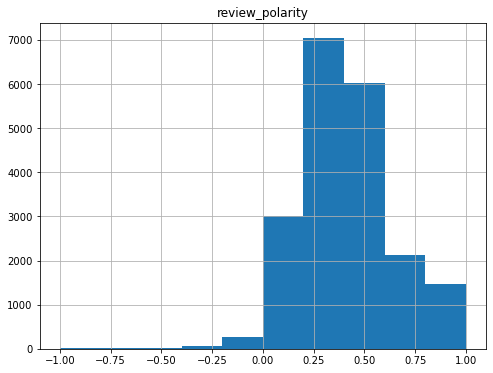

In [17]:
fenway_neighbourhood_home = fenway_neighbourhood.where("room_type == 'Entire home/apt'")
fenway_neighbourhood_home = fenway_neighbourhood_home.withColumn("review_polarity", fenway_neighbourhood_home["review_polarity"].cast(DoubleType())).toPandas()
fenway_neighbourhood_home.hist(column="review_polarity",figsize=(8,6))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f748a143790>]],
      dtype=object)

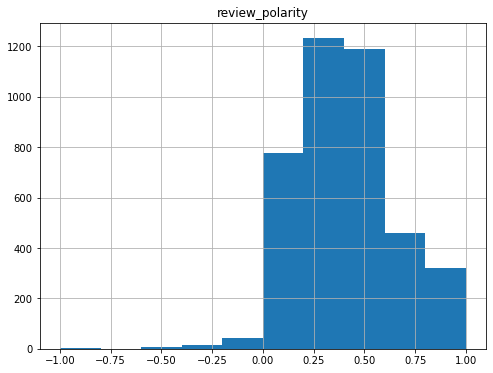

In [18]:
fenway_neighbourhood_private = fenway_neighbourhood.where("room_type == 'Private room'")
fenway_neighbourhood_private = fenway_neighbourhood_private.withColumn("review_polarity", fenway_neighbourhood_private["review_polarity"].cast(DoubleType())).toPandas()
fenway_neighbourhood_private.hist(column="review_polarity", figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f748a2bbf10>]],
      dtype=object)

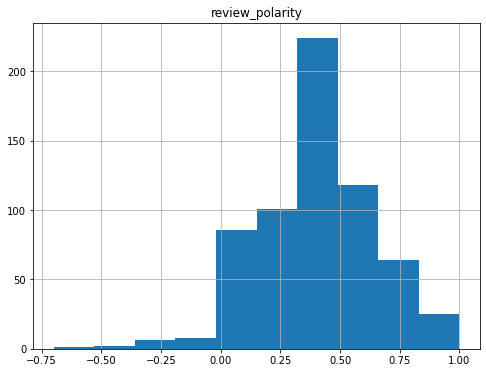

In [19]:
fenway_neighbourhood_shared = fenway_neighbourhood.where("room_type == 'Shared room'")
fenway_neighbourhood_shared = fenway_neighbourhood_shared.withColumn("review_polarity", fenway_neighbourhood_shared["review_polarity"].cast(DoubleType())).toPandas()
fenway_neighbourhood_shared.hist(column="review_polarity", figsize=(8,6))

## Allston:

Let's combine Allston data from all the years

In [20]:
allston_neighbourhood = boston_neighbourhood_2015.where("neighbourhood == 'Allston'").union(boston_neighbourhood_2016.where("neighbourhood == 'Allston'"))
allston_neighbourhood = allston_neighbourhood.union(boston_neighbourhood_2017.where("neighbourhood == 'Allston'"))
allston_neighbourhood = allston_neighbourhood.union(boston_neighbourhood_2018.where("neighbourhood == 'Allston'"))
allston_neighbourhood = allston_neighbourhood.union(boston_neighbourhood_2019.where("neighbourhood == 'Allston'"))
allston_neighbourhood = allston_neighbourhood.union(boston_neighbourhood_2020.where("neighbourhood == 'Allston'"))
allston_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,23590000,2014-12-05,20261863,Sunny,Great place...super warm home in a super cold ...,2015
1,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,25103537,2015-01-06,24847473,Louis,"""I stayed here for about 2 weeks and really ca...",2015
2,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28495244,2015-03-24,29219963,Keith,Staying at Cindy's was great!! I had a comfor...,2015
3,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28682269,2015-03-28,28805399,Peter,Cindy is great and the accommodations were per...,2015
4,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28740213,2015-03-29,29169681,Gregory,The house was nice and Cindy was lovely!,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32266,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,1.04,5,341,41214604,621530738,2020-04-01,342355886,Milaun Eustace,Worst place ever,2020
32267,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,1.04,5,341,41214604,625602370,2020-05-22,345205010,Darline,"Great place, host was very responsive",2020
32268,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,1.04,5,341,41214604,627108857,2020-05-31,343325469,Mary,Warm generous space gracious host clean and ti...,2020
32269,Allston,41949153,Walk to Harvard ★FREE PARKING ★ Clean & Conven...,8441226,Justin,None,42.36322,-71.13148,Entire home/apt,399,...,0.62,1,3,41949153,614900529,2020-03-06,300989567,Erin,Justin is a superb host! His property is supe...,2020


Let's translate all the reviews to english first

In [21]:
allston_neighbourhood = allston_neighbourhood.withColumn('comments', translate_udf(F.col("comments")))
allston_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,23590000,2014-12-05,20261863,Sunny,Great place...super warm home in a super cold ...,2015
1,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,25103537,2015-01-06,24847473,Louis,"""I stayed here for about 2 weeks and really ca...",2015
2,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28495244,2015-03-24,29219963,Keith,Staying at Cindy's was great!! I had a comfor...,2015
3,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28682269,2015-03-28,28805399,Peter,Cindy is great and the accommodations were per...,2015
4,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,2.18,6,335,4278873,28740213,2015-03-29,29169681,Gregory,The house was nice and Cindy was lovely!,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32266,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,1.04,5,341,41214604,621530738,2020-04-01,342355886,Milaun Eustace,Worst place ever,2020
32267,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,1.04,5,341,41214604,625602370,2020-05-22,345205010,Darline,"Great place, host was very responsive",2020
32268,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,1.04,5,341,41214604,627108857,2020-05-31,343325469,Mary,Warm generous space gracious host clean and ti...,2020
32269,Allston,41949153,Walk to Harvard ★FREE PARKING ★ Clean & Conven...,8441226,Justin,None,42.36322,-71.13148,Entire home/apt,399,...,0.62,1,3,41949153,614900529,2020-03-06,300989567,Erin,Justin is a superb host! His property is supe...,2020


Calculate the polarity of each review

In [22]:
allston_neighbourhood = allston_neighbourhood.withColumn('review_polarity', sentiment_udf(F.col("comments")))
allston_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year,review_polarity
0,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,6,335,4278873,23590000,2014-12-05,20261863,Sunny,Great place...super warm home in a super cold ...,2015,0.33166666666666667
1,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,6,335,4278873,25103537,2015-01-06,24847473,Louis,"""I stayed here for about 2 weeks and really ca...",2015,0.15000000000000002
2,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,6,335,4278873,28495244,2015-03-24,29219963,Keith,Staying at Cindy's was great!! I had a comfor...,2015,0.36874999999999997
3,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,6,335,4278873,28682269,2015-03-28,28805399,Peter,Cindy is great and the accommodations were per...,2015,0.9
4,Allston,4278873,STUNNING ROOM PRIVATE BATH ALLSTON,9189449,Cindy,None,42.35192949192535,-71.14205607147838,Private room,85,...,6,335,4278873,28740213,2015-03-29,29169681,Gregory,The house was nice and Cindy was lovely!,2015,0.6125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32266,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,5,341,41214604,621530738,2020-04-01,342355886,Milaun Eustace,Worst place ever,2020,-1.0
32267,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,5,341,41214604,625602370,2020-05-22,345205010,Darline,"Great place, host was very responsive",2020,0.5
32268,Allston,41214604,"Cozy, private room in the heart of Boston/Allston",322016118,Jay,None,42.35264,-71.13469,Private room,50,...,5,341,41214604,627108857,2020-05-31,343325469,Mary,Warm generous space gracious host clean and ti...,2020,0.4166666666666667
32269,Allston,41949153,Walk to Harvard ★FREE PARKING ★ Clean & Conven...,8441226,Justin,None,42.36322,-71.13148,Entire home/apt,399,...,1,3,41949153,614900529,2020-03-06,300989567,Erin,Justin is a superb host! His property is supe...,2020,0.5690000000000001


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7486033190>]],
      dtype=object)

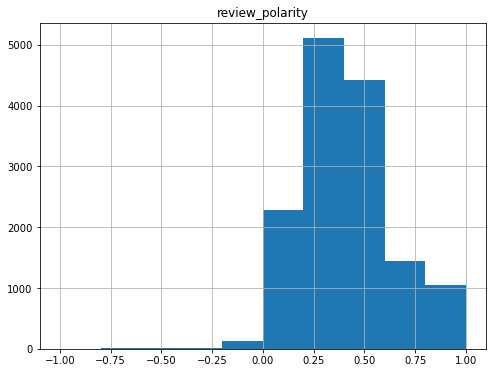

In [23]:
allston_neighbourhood_home = allston_neighbourhood.where("room_type == 'Entire home/apt'")
allston_neighbourhood_home = allston_neighbourhood_home.withColumn("review_polarity", allston_neighbourhood_home["review_polarity"].cast(DoubleType())).toPandas()
allston_neighbourhood_home.hist(column="review_polarity", figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f747e691950>]],
      dtype=object)

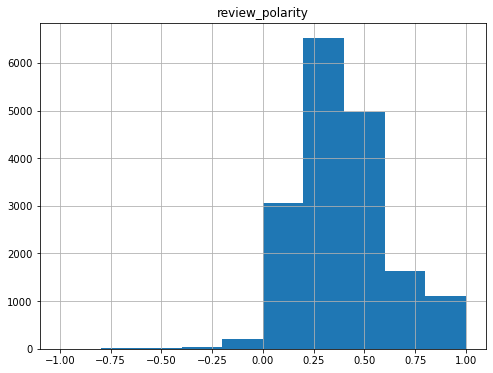

In [24]:
allston_neighbourhood_private = allston_neighbourhood.where("room_type == 'Private room'")
allston_neighbourhood_private = allston_neighbourhood_private.withColumn("review_polarity", allston_neighbourhood_private["review_polarity"].cast(DoubleType())).toPandas()
allston_neighbourhood_private.hist(column="review_polarity", figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f747fcede10>]],
      dtype=object)

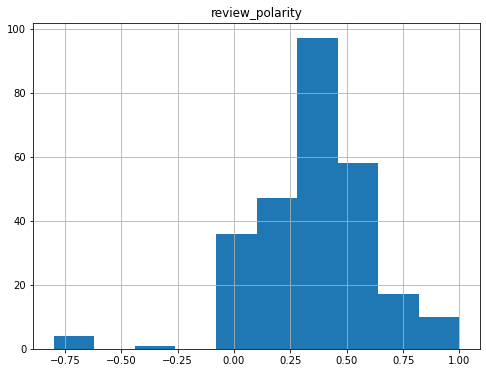

In [25]:
allston_neighbourhood_shared = allston_neighbourhood.where("room_type == 'Shared room'")
allston_neighbourhood_shared  = allston_neighbourhood_shared .withColumn("review_polarity", allston_neighbourhood_shared ["review_polarity"].cast(DoubleType())).toPandas()
allston_neighbourhood_shared.hist(column="review_polarity", figsize=(8,6))

## Dorchester:

Let's combine Dorchester data from all the years

In [12]:
dorchester_neighbourhood = boston_neighbourhood_2015.where("neighbourhood == 'Dorchester'").union(boston_neighbourhood_2016.where("neighbourhood == 'Dorchester'"))
dorchester_neighbourhood = dorchester_neighbourhood.union(boston_neighbourhood_2017.where("neighbourhood == 'Dorchester'"))
dorchester_neighbourhood = dorchester_neighbourhood.union(boston_neighbourhood_2018.where("neighbourhood == 'Dorchester'"))
dorchester_neighbourhood = dorchester_neighbourhood.union(boston_neighbourhood_2019.where("neighbourhood == 'Dorchester'"))
dorchester_neighbourhood = dorchester_neighbourhood.union(boston_neighbourhood_2020.where("neighbourhood == 'Dorchester'"))
dorchester_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,reviews_per_month,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year
0,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,6.00,2,113,1178371,28676935,2015-03-28,14041306,Courtney,Victoria and her husband were great hosts. The...,2015
1,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,6.00,2,113,1178371,28959987,2015-04-01,29554589,Moses,This is my first time using airbnb for reserva...,2015
2,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,6.00,2,113,1178371,29433258,2015-04-07,16743056,Derek,Victoria is a very welcoming host. She's answe...,2015
3,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,6.00,2,113,1178371,29936919,2015-04-14,29835451,Brittany,This was my first Airbnb experience and it was...,2015
4,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,6.00,2,113,1178371,30316452,2015-04-20,29599817,Damon,I had a delightful stay at Victoria's home ove...,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85446,Dorchester,42830725,Upscale Duplex | Near T,161724560,David,None,42.32112,-71.0567,Entire home/apt,960,...,1.05,4,318,42830725,619667236,2020-03-18,278948310,Mani,It was truly a pleasure to stay at David's hom...,2020
85447,Dorchester,42830725,Upscale Duplex | Near T,161724560,David,None,42.32112,-71.0567,Entire home/apt,960,...,1.05,4,318,42830725,619847024,2020-03-19,318923611,Mike,Awesome home!! David is the perfect host!,2020
85448,Dorchester,42831086,Lovely Home | near T,161724560,David,None,42.31952,-71.05529,Entire home/apt,740,...,1.06,4,333,42831086,619674889,2020-03-18,333711103,Nathan,David's home is so great! He was very helpful ...,2020
85449,Dorchester,42831086,Lovely Home | near T,161724560,David,None,42.31952,-71.05529,Entire home/apt,740,...,1.06,4,333,42831086,620071225,2020-03-20,314497309,Patty,Super clean and wonderful home! My grand kids ...,2020


Calculate the polarity of each review

In [13]:
dorchester_neighbourhood = dorchester_neighbourhood.withColumn('review_polarity', sentiment_udf(F.col("comments")))
dorchester_neighbourhood.toPandas()

,neighbourhood,id,name,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,listing_id,review_id,date,reviewer_id,reviewer_name,comments,year,review_polarity
0,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,2,113,1178371,28676935,2015-03-28,14041306,Courtney,Victoria and her husband were great hosts. The...,2015,0.2518518518518518
1,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,2,113,1178371,28959987,2015-04-01,29554589,Moses,This is my first time using airbnb for reserva...,2015,0.39444444444444443
2,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,2,113,1178371,29433258,2015-04-07,16743056,Derek,Victoria is a very welcoming host. She's answe...,2015,0.47222222222222227
3,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,2,113,1178371,29936919,2015-04-14,29835451,Brittany,This was my first Airbnb experience and it was...,2015,0.4753968253968254
4,Dorchester,1178371,Historical Gaslight Street - R2,6430732,Victoria,None,42.29456752543741,-71.06681276312973,Private room,45,...,2,113,1178371,30316452,2015-04-20,29599817,Damon,I had a delightful stay at Victoria's home ove...,2015,0.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85446,Dorchester,42830725,Upscale Duplex | Near T,161724560,David,None,42.32112,-71.0567,Entire home/apt,960,...,4,318,42830725,619667236,2020-03-18,278948310,Mani,It was truly a pleasure to stay at David's hom...,2020,1.0
85447,Dorchester,42830725,Upscale Duplex | Near T,161724560,David,None,42.32112,-71.0567,Entire home/apt,960,...,4,318,42830725,619847024,2020-03-19,318923611,Mike,Awesome home!! David is the perfect host!,2020,1.0
85448,Dorchester,42831086,Lovely Home | near T,161724560,David,None,42.31952,-71.05529,Entire home/apt,740,...,4,333,42831086,619674889,2020-03-18,333711103,Nathan,David's home is so great! He was very helpful ...,2020,0.6
85449,Dorchester,42831086,Lovely Home | near T,161724560,David,None,42.31952,-71.05529,Entire home/apt,740,...,4,333,42831086,620071225,2020-03-20,314497309,Patty,Super clean and wonderful home! My grand kids ...,2020,0.5666666666666668


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f39b4d50090>]],
      dtype=object)

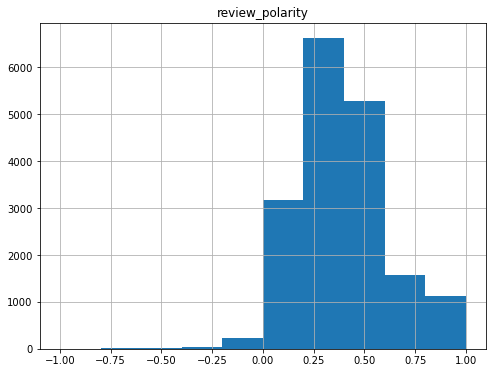

In [17]:
dorchester_neighbourhood_home = dorchester_neighbourhood.where("room_type == 'Entire home/apt'")
dorchester_neighbourhood_home  = dorchester_neighbourhood_home.withColumn("review_polarity", dorchester_neighbourhood_home["review_polarity"].cast(DoubleType())).toPandas()
dorchester_neighbourhood_home.hist(column="review_polarity", figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f399eae6450>]],
      dtype=object)

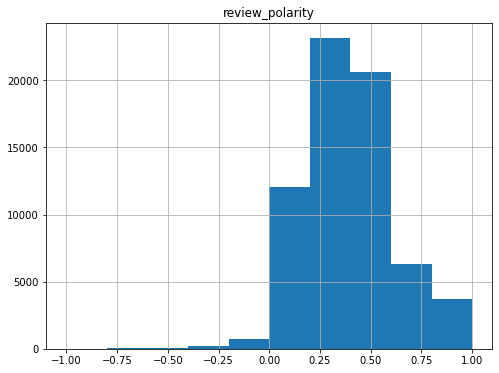

In [18]:
dorchester_neighbourhood_private = dorchester_neighbourhood.where("room_type == 'Private room'")
dorchester_neighbourhood_private  = dorchester_neighbourhood_private.withColumn("review_polarity", dorchester_neighbourhood_private["review_polarity"].cast(DoubleType())).toPandas()
dorchester_neighbourhood_private.hist(column="review_polarity", figsize=(8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6dfa2b2c50>]],
      dtype=object)

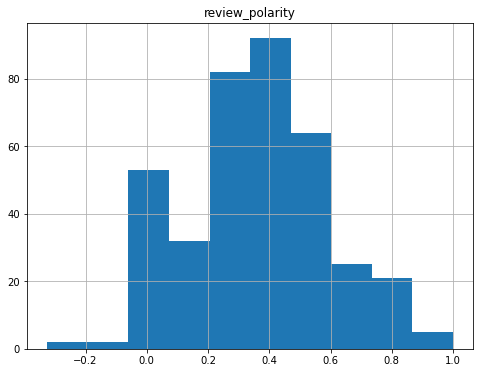

In [14]:
dorchester_neighbourhood_shared = dorchester_neighbourhood.where("room_type == 'Shared room'")
dorchester_neighbourhood_shared  = dorchester_neighbourhood_shared.withColumn("review_polarity", dorchester_neighbourhood_shared["review_polarity"].cast(DoubleType())).toPandas()
dorchester_neighbourhood_shared.hist(column="review_polarity", figsize=(8,6))